In [3]:
import pyspark
from pyspark import SparkContext
import imageio
import os
import numpy as np
from scipy.ndimage import median_filter

def readImg(path):
    img = imageio.imread(path)
    im = np.array(img,dtype='uint8')
    return im

def writeImg(path,buf):
    imageio.imwrite(path,buf)

def part_median_filter(local_data):
    part_id = int(local_data[0])
    first   = int(local_data[1])
    end     = int(local_data[2])
    buf     = local_data[3]
    nx=buf.shape[0]
    ny=buf.shape[1]
    new_buf=np.array([end-first,ny, 3],dtype='uint8')
    #new_buf=np.array(buf[end-first,ny],dtype='uint8')
    #print(new_buf)
    #writeImg("test.jpg",new_buf)
    
    new_buf = median_filter(buf, size=(3,3,3))
    
    return part_id,new_buf



In [28]:

data_dir = '.'
file = os.path.join(data_dir,'lena_noisy.jpg')
img_buf=readImg(file)
print('SHAPE',img_buf.shape)
# print('IMG\n',img_buf)
nx=img_buf.shape[0]
ny=img_buf.shape[1]
nb_partitions = 8
print("NB PARTITIONS : ",nb_partitions)
data=[]
begin=0
block_size=nx/nb_partitions
for ip in range(nb_partitions):
    end=min(begin+block_size,nx)
    data.append([ip,begin,end,img_buf])
    begin=end

SHAPE (128, 128, 3)
NB PARTITIONS :  8


In [9]:
 ###########################################################################
    #
    # CREATE SPARKCONTEXT
sc =SparkContext()
data_rdd = sc.parallelize(data,nb_partitions)

In [18]:
# print(data)
# data.shape
type(data)
print(data_rdd)

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:274


In [20]:
 ###########################################################################
    #
    # PARALLEL MEDIAN FILTER COMPUTATION
result_rdd = data_rdd.map(part_median_filter)
result_data = result_rdd.collect()

# new_img_buf=np.array([nx,ny],dtype='uint8')
new_img_buf= np.array(result_data[2][1], dtype='uint8')

(128, 128, 3)

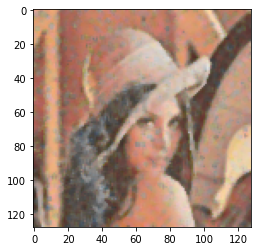

In [29]:
import matplotlib.pyplot as plt
# plt.imshow(img_buf)
#plt.imshow(result_data[2][1])
#plt.imshow(result_data[1][1])
#plt.imshow(result_data[0][1])
# plt.imshow(result_data[3][1])
# plt.imshow(result_data[4][1])
# plt.imshow(result_data[5][1])
# plt.imshow(result_data[6][1])
plt.imshow(result_data[7][1])
#plt.imshow(result_data[8][1])
#plt.imshow(result_data[1][1])
#plt.imshow(result_data[2][2])
# print(result_data[2][1])
result_data[4][1].shape
# type(result_data)

In [22]:
###########################################################################
    #
    # COMPUTE NEW IMAGE RESULTS FROM RESULT RDD
    # TODO
print('CREATE NEW PICTURE FILE')
filter_file = os.path.join(data_dir,'lena_filter.jpg')
#writeImg(filter_file,np.array(result_data, dtype='uint8'))
#writeImg(filter_file,np.array(data, dtype='uint8'))
result_data[2][1]

# writeImg(filter_file,np.array(result_data[2][1], dtype='uint8'))

writeImg(filter_file,new_img_buf)
# if __name__ == '__main__':
#     main()


CREATE NEW PICTURE FILE
